In [1]:
!pip install pmdarima

In [2]:
# import liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [3]:
airline = pd.read_excel(r"C:\Users\Mohan Patil\OneDrive\Desktop\Datasets\Airlines+Data.xlsx",index_col='Month',parse_dates=True)
airline

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [4]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


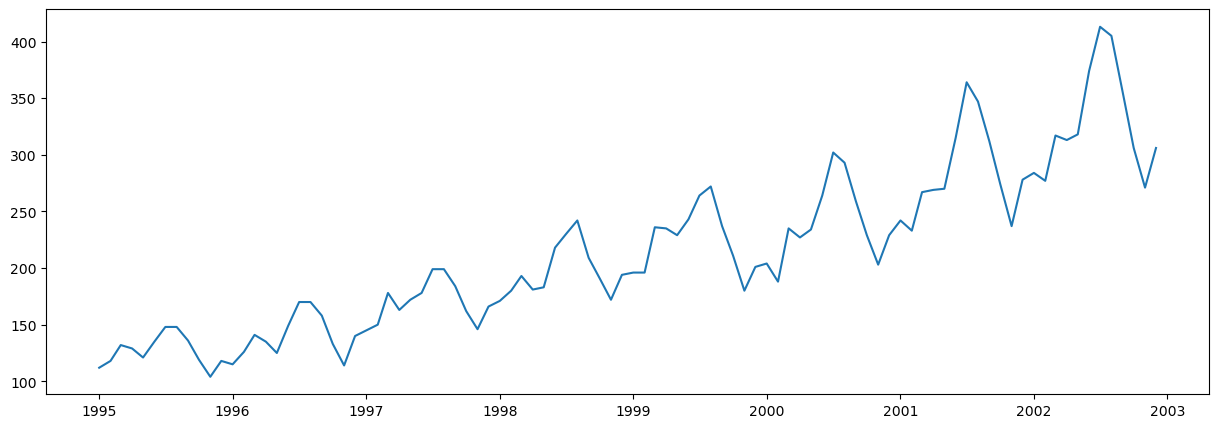

In [5]:
# Create lineplot
plt.figure(figsize=(15,5))
plt.plot(airline)

array([[<AxesSubplot:title={'center':'Passengers'}>]], dtype=object)

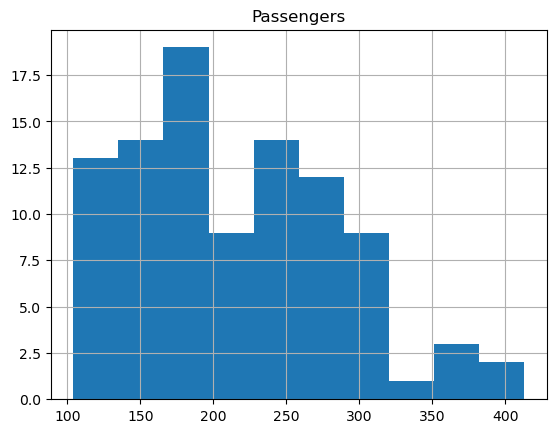

In [6]:
# Create histogram
airline.hist()

<AxesSubplot:ylabel='Density'>

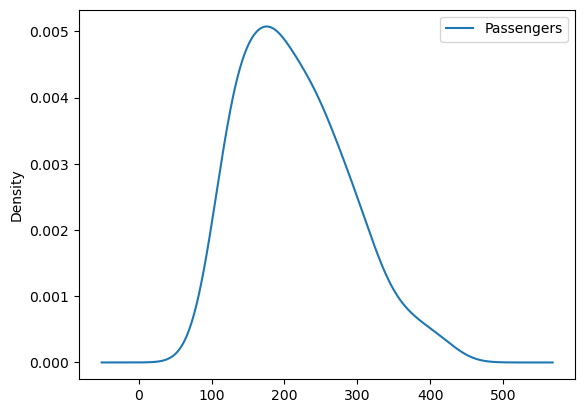

In [7]:
# Create density plot
airline.plot(kind='kde')

In [8]:
type(airline)

pandas.core.frame.DataFrame

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

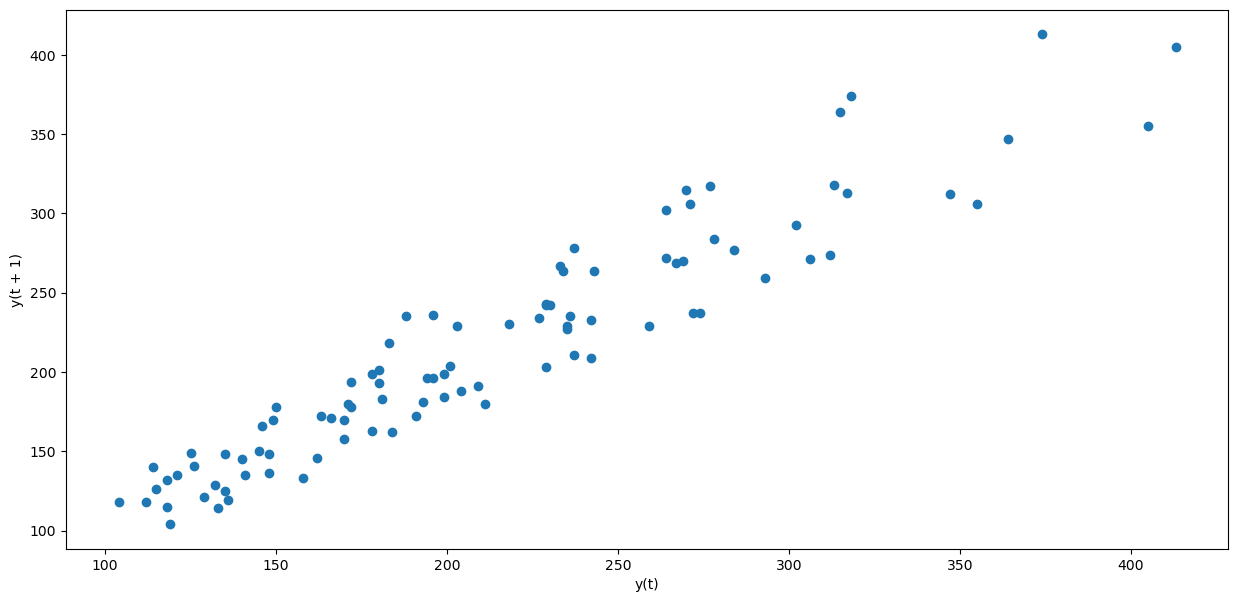

In [9]:
# Create Lagplot
plt.figure(figsize=(15,7))
pd.plotting.lag_plot(airline)

<Figure size 2500x2000 with 0 Axes>

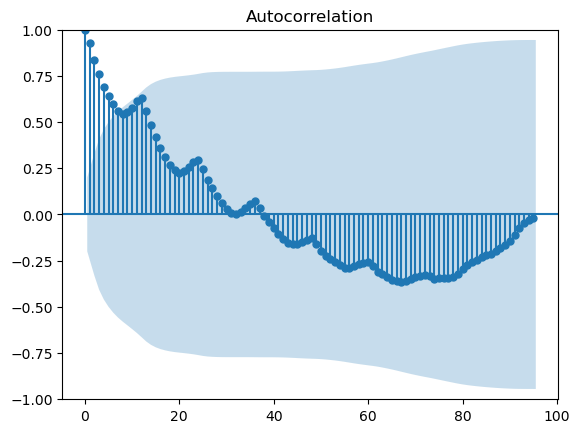

In [10]:
# Create an autocorrelation plot
plt.figure(figsize=(25,20))
plot_acf(airline,lags=95)
plt.show()

### Sampling And transformation

In [11]:
airline

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [12]:
upsample=airline.resample('D').mean()
upsample.head(10)

,Passengers
Month,
1995-01-01,112.0
1995-01-02,NaN
1995-01-03,NaN
1995-01-04,NaN
1995-01-05,NaN
1995-01-06,NaN
1995-01-07,NaN
1995-01-08,NaN
1995-01-09,NaN


In [13]:
upsample.shape

(2892, 1)

In [14]:
# Interpolate missing value
interpolates = upsample.interpolate(method='linear')
interpolates.head(10)

,Passengers
Month,
1995-01-01,112.000000
1995-01-02,112.193548
1995-01-03,112.387097
1995-01-04,112.580645
1995-01-05,112.774194
1995-01-06,112.967742
1995-01-07,113.161290
1995-01-08,113.354839
1995-01-09,113.548387


<AxesSubplot:xlabel='Month'>

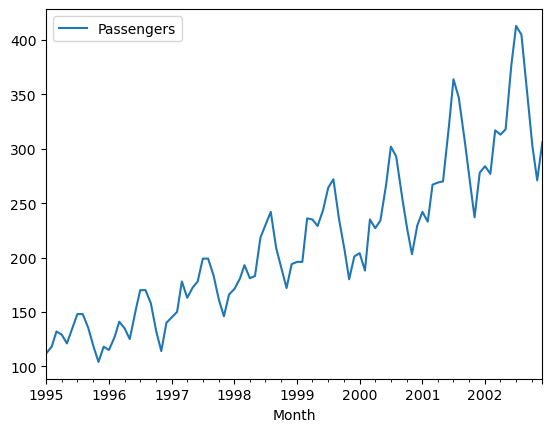

In [15]:
interpolates.plot()

### Downsampling and transformation

In [16]:
downsamples = airline.resample('Q').mean()# Downsample to quarterly
downsamples.head(10)

,Passengers
Month,
1995-03-31,120.666667
1995-06-30,128.333333
1995-09-30,144.000000
1995-12-31,113.666667
1996-03-31,127.333333
1996-06-30,136.333333
1996-09-30,166.000000
1996-12-31,129.000000
1997-03-31,157.666667


<AxesSubplot:xlabel='Month'>

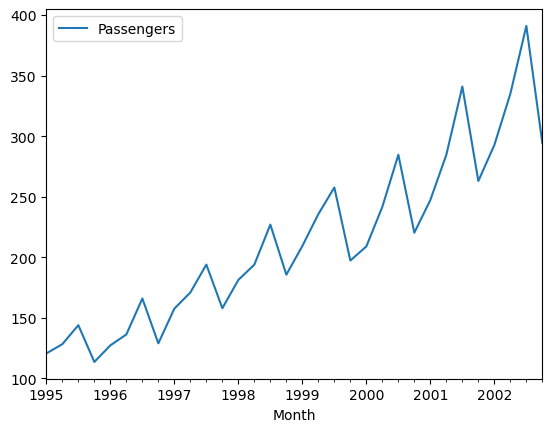

In [17]:
downsamples.plot()

## Transformation

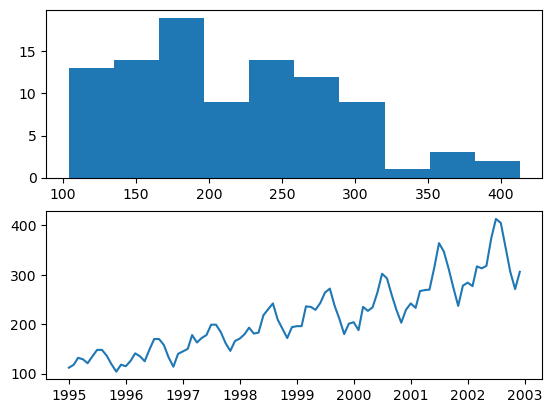

In [18]:
# Line plot
plt.subplot(212)
plt.plot(airline)

# histogram
plt.subplot(211)
plt.hist(airline)

plt.show()

# Log transform

In [19]:
dataframe = pd.DataFrame(np.log(airline.values),columns=['Passengers'])
dataframe

,Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
91,6.003887
92,5.872118
93,5.723585
94,5.602119


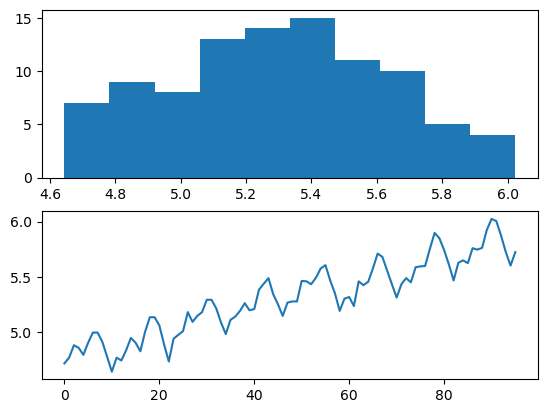

In [20]:
# Line plot
plt.subplot(212)
plt.plot(dataframe['Passengers'])

# histogram
plt.subplot(211)
plt.hist(dataframe['Passengers'])

plt.show()

In [21]:
downsamples.head()

,Passengers
Month,
1995-03-31,120.666667
1995-06-30,128.333333
1995-09-30,144.000000
1995-12-31,113.666667
1996-03-31,127.333333


# Square_root_transformation

In [22]:
dataframes = pd.DataFrame(np.sqrt(airline.values),columns=['Passengers'])
dataframes

,Passengers
0,10.583005
1,10.862780
2,11.489125
3,11.357817
4,11.000000
...,...
91,20.124612
92,18.841444
93,17.492856
94,16.462078


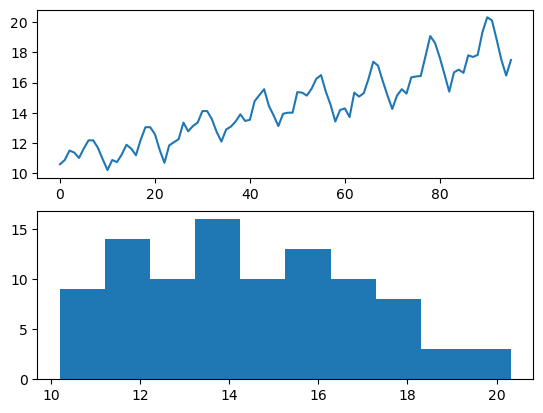

In [23]:
# line plot
plt.subplot(211)
plt.plot(dataframes['Passengers'])

# histogram
plt.subplot(212)
plt.hist(dataframes['Passengers'])
plt.show()

# Model_Based_Method-Forcasting

In [24]:
airline2 = pd.read_excel(r"C:\Users\Mohan Patil\OneDrive\Desktop\Datasets\Airlines+Data.xlsx")

In [25]:
airline2.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [26]:
airline2["month"]=airline2.Month.dt.strftime("%b")
airline2['year']=airline2.Month.dt.strftime("%y")

In [27]:
airline2

,Month,Passengers,month,year
0,1995-01-01,112,Jan,95
1,1995-02-01,118,Feb,95
2,1995-03-01,132,Mar,95
3,1995-04-01,129,Apr,95
4,1995-05-01,121,May,95
...,...,...,...,...
91,2002-08-01,405,Aug,02
92,2002-09-01,355,Sep,02
93,2002-10-01,306,Oct,02
94,2002-11-01,271,Nov,02


<AxesSubplot:xlabel='year', ylabel='Passengers'>

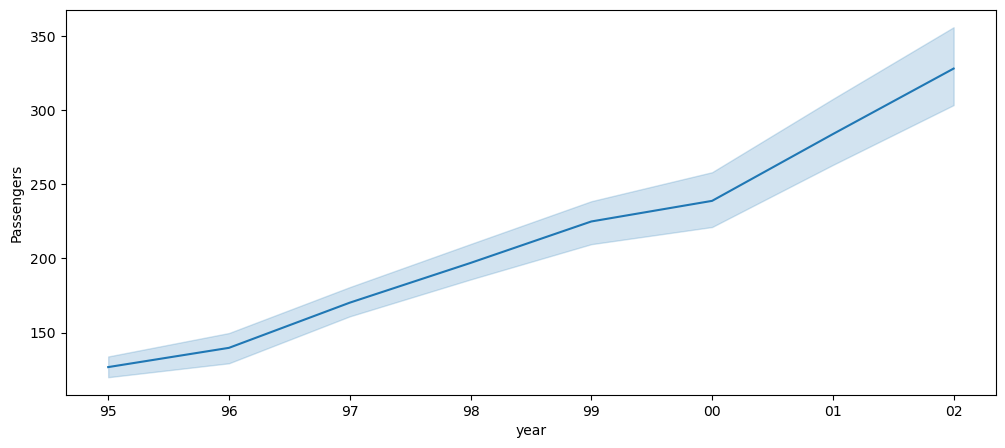

In [28]:
# lineplot 
plt.figure(figsize=(12,5))
sns.lineplot(x="year",y="Passengers",data=airline2)

In [29]:
pt = pd.pivot_table(data=airline2,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
pt

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
00,227,293,229,188,204,302,264,235,234,203,229,259
01,269,347,278,233,242,364,315,267,270,237,274,312
02,313,405,306,277,284,413,374,317,318,271,306,355
95,129,148,118,118,112,148,135,132,121,104,119,136
96,135,170,140,126,115,170,149,141,125,114,133,158
97,163,199,166,150,145,199,178,178,172,146,162,184
98,181,242,194,180,171,230,218,193,183,172,191,209
99,235,272,201,196,196,264,243,236,229,180,211,237


<AxesSubplot:xlabel='month', ylabel='year'>

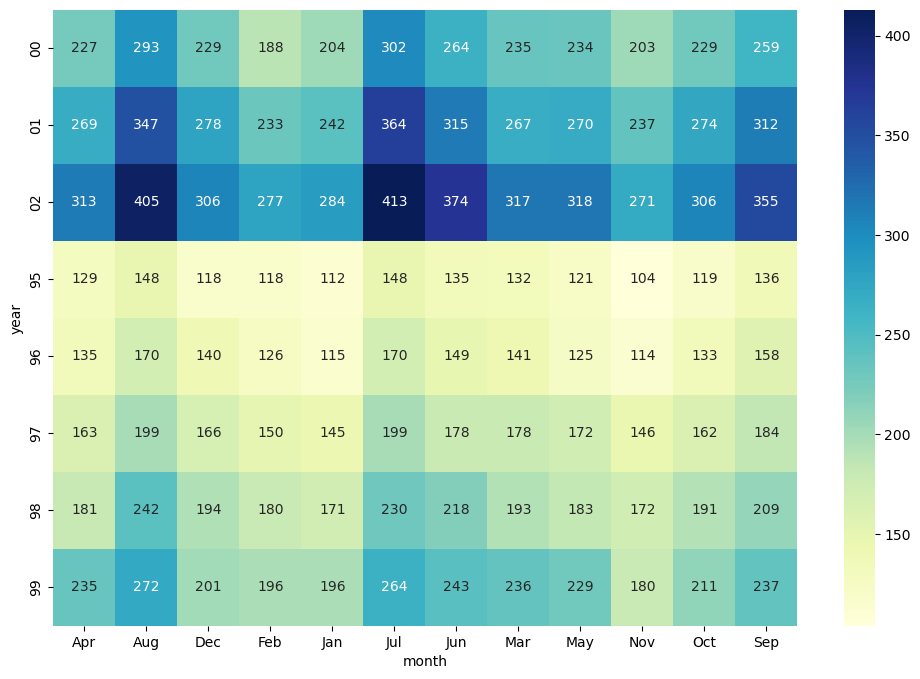

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(pt,annot=True,fmt="g",cmap="YlGnBu")

<AxesSubplot:xlabel='year', ylabel='Passengers'>

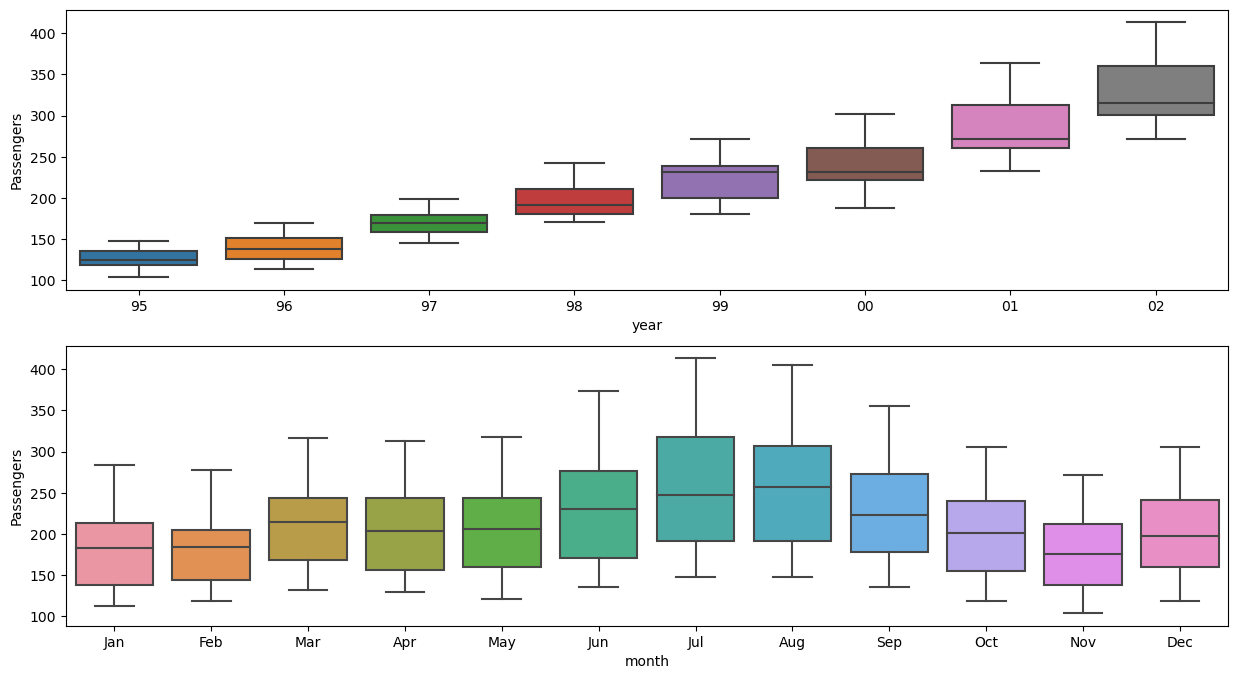

In [31]:
# Boxplot
plt.figure(figsize=(15,8))

plt.subplot(212)
sns.boxplot(x="month",y="Passengers",data=airline2)

plt.subplot(211)
sns.boxplot(x="year",y="Passengers",data=airline2)

# calculate value of t,t_sqaure,log

In [32]:
airline2.shape

(96, 4)

In [33]:
airline2.head()

,Month,Passengers,month,year
0,1995-01-01,112,Jan,95
1,1995-02-01,118,Feb,95
2,1995-03-01,132,Mar,95
3,1995-04-01,129,Apr,95
4,1995-05-01,121,May,95


In [34]:
airline2['t']=np.arange(1,97)
airline2['t_square']=np.square(airline2.t)
airline2['log_Passengers']=np.log(airline2.Passengers)
airline3=pd.get_dummies(airline2['month'])

In [35]:
airline3

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [36]:
airline2

,Month,Passengers,month,year,t,t_square,log_Passengers
0,1995-01-01,112,Jan,95,1,1,4.718499
1,1995-02-01,118,Feb,95,2,4,4.770685
2,1995-03-01,132,Mar,95,3,9,4.882802
3,1995-04-01,129,Apr,95,4,16,4.859812
4,1995-05-01,121,May,95,5,25,4.795791
...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,02,92,8464,6.003887
92,2002-09-01,355,Sep,02,93,8649,5.872118
93,2002-10-01,306,Oct,02,94,8836,5.723585
94,2002-11-01,271,Nov,02,95,9025,5.602119


In [37]:
airline_ttl=pd.concat([airline2,airline3],axis=1)
airline_ttl

,Month,Passengers,month,year,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,95,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,95,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,95,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,95,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,95,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,02,92,8464,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,Sep,02,93,8649,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,Oct,02,94,8836,5.723585,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,Nov,02,95,9025,5.602119,0,0,0,0,0,0,0,0,0,1,0,0


# Split data into train And Test

In [38]:
train = airline_ttl.head(84)
test = airline_ttl.tail(12)

In [39]:
train

,Month,Passengers,month,year,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,95,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,95,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,95,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,95,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,95,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2001-08-01,347,Aug,01,80,6400,5.849325,0,1,0,0,0,0,0,0,0,0,0,0
80,2001-09-01,312,Sep,01,81,6561,5.743003,0,0,0,0,0,0,0,0,0,0,0,1
81,2001-10-01,274,Oct,01,82,6724,5.613128,0,0,0,0,0,0,0,0,0,0,1,0
82,2001-11-01,237,Nov,01,83,6889,5.468060,0,0,0,0,0,0,0,0,0,1,0,0


In [40]:
test

,Month,Passengers,month,year,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
84,2002-01-01,284,Jan,02,85,7225,5.648974,0,0,0,0,1,0,0,0,0,0,0,0
85,2002-02-01,277,Feb,02,86,7396,5.624018,0,0,0,1,0,0,0,0,0,0,0,0
86,2002-03-01,317,Mar,02,87,7569,5.758902,0,0,0,0,0,0,0,1,0,0,0,0
87,2002-04-01,313,Apr,02,88,7744,5.746203,1,0,0,0,0,0,0,0,0,0,0,0
88,2002-05-01,318,May,02,89,7921,5.762051,0,0,0,0,0,0,0,0,1,0,0,0
89,2002-06-01,374,Jun,02,90,8100,5.924256,0,0,0,0,0,0,1,0,0,0,0,0
90,2002-07-01,413,Jul,02,91,8281,6.023448,0,0,0,0,0,1,0,0,0,0,0,0
91,2002-08-01,405,Aug,02,92,8464,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,Sep,02,93,8649,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,Oct,02,94,8836,5.723585,0,0,0,0,0,0,0,0,0,0,1,0


In [41]:
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

In [42]:
# linear model
linear_model = smf.ols("Passengers~t",data=train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

53.19923653480271

In [43]:
# Exponential model
exp_model = smf.ols('log_Passengers~t',data=train).fit()
pred_exp_model=pd.Series(exp_model.predict(pd.DataFrame(test['t'])))
rmse_exp_model=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_exp_model)))**2))
rmse_exp_model

46.05736110315635

In [44]:
# Quadratic model
Quad = smf.ols('Passengers~t+t_square',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[['t','t_square']]))
rmse_Quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

48.05188897933164

In [45]:
# Additive seasonality model
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

132.81978481421814

In [46]:
# Additive Seasonality Quadratic 
add_sea_Quad = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

26.360817612095165

In [48]:
# Multiplicative Seasonality
mult_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred_mult_sea = pd.Series(mult_sea.predict(test))
rmse_mult_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_mult_sea)))**2))
rmse_mult_sea

140.06320204708626

In [49]:
# Multiplicative Additive Seasonality 
mul_add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred_mult_add_sea = pd.Series(mul_add_sea.predict(test))
rmse_mult_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_mult_add_sea)))**2))
rmse_mult_add_sea

10.519172544323894

In [50]:
#Multiplicative Seasonality Quadratic 
mult_sea_Quad = smf.ols('log_Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_mult_sea_quad = pd.Series(mult_sea_Quad.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_mult_sea_quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_mult_sea_quad))**2))
rmse_mult_sea_quad

325.73121052134104

In [51]:
# Compare the results
data = {"Model":pd.Series(['rmse_linear','rmse_exp_model','rmse_Quad','rmse_add_sea','rmse_add_sea_quad','rmse_mult_sea','rmse_mult_add_sea','rmse_mult_sea_quad'])
        ,"RMSE_Values":pd.Series([rmse_linear,rmse_exp_model,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_mult_sea,rmse_mult_add_sea,rmse_mult_sea_quad])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,Model,RMSE_Values
6,rmse_mult_add_sea,10.519173
4,rmse_add_sea_quad,26.360818
1,rmse_exp_model,46.057361
2,rmse_Quad,48.051889
0,rmse_linear,53.199237
3,rmse_add_sea,132.819785
5,rmse_mult_sea,140.063202
7,rmse_mult_sea_quad,325.731211


In [52]:
# Build the Model On Full dataset
model_full = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=airline_ttl).fit()


In [53]:
pred_new = pd.Series(model_full.predict(airline_ttl))
pred_new

0     4.692963
1     4.703487
2     4.846666
3     4.813814
4     4.807291
        ...   
91    5.978339
92    5.868100
93    5.737989
94    5.607538
95    5.744085
Length: 96, dtype: float64

In [54]:
airline_ttl['Forcasted_Passengers']=pd.Series(np.exp(pred_new))

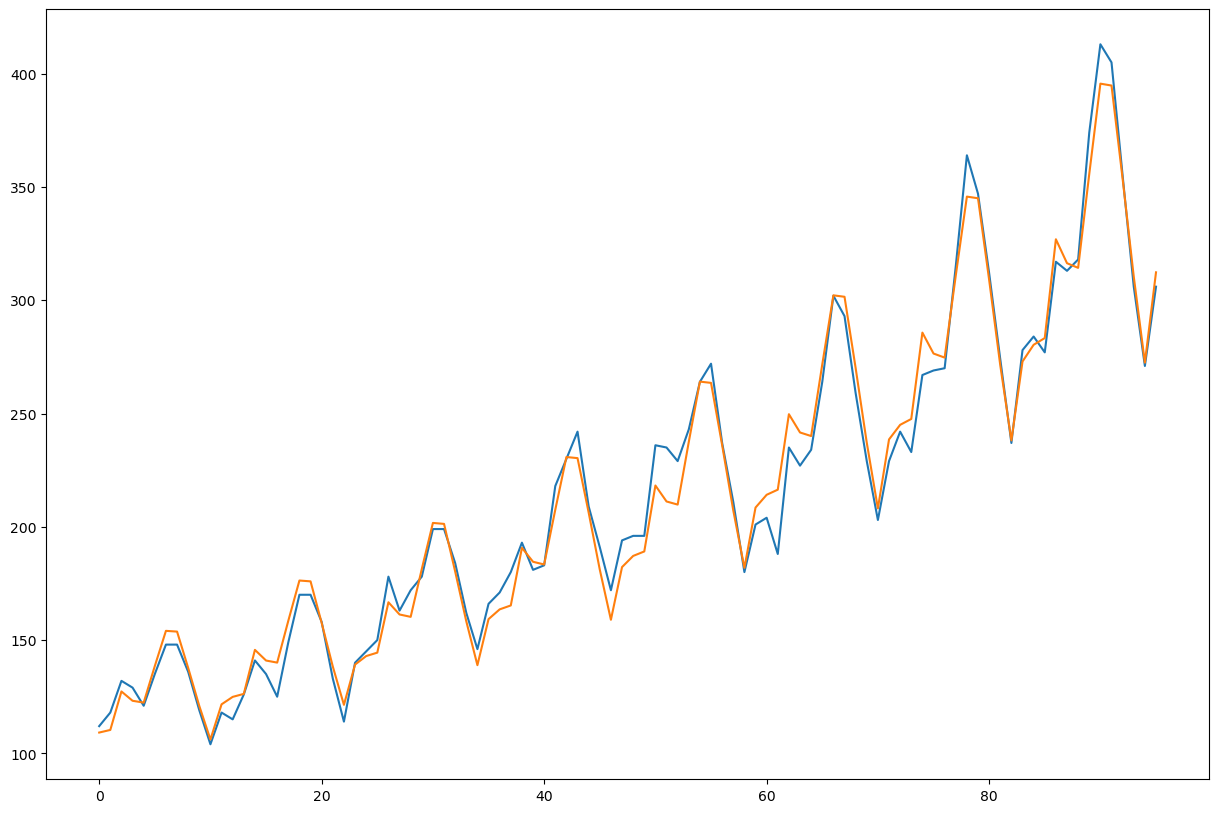

In [55]:
plt.figure(figsize=(15,10))
plt.plot(airline_ttl[['Passengers','Forcasted_Passengers']].reset_index(drop=True))

In [56]:
airline.head(10)

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
1995-06-01,135
1995-07-01,148
1995-08-01,148
1995-09-01,136


## Moving Average -

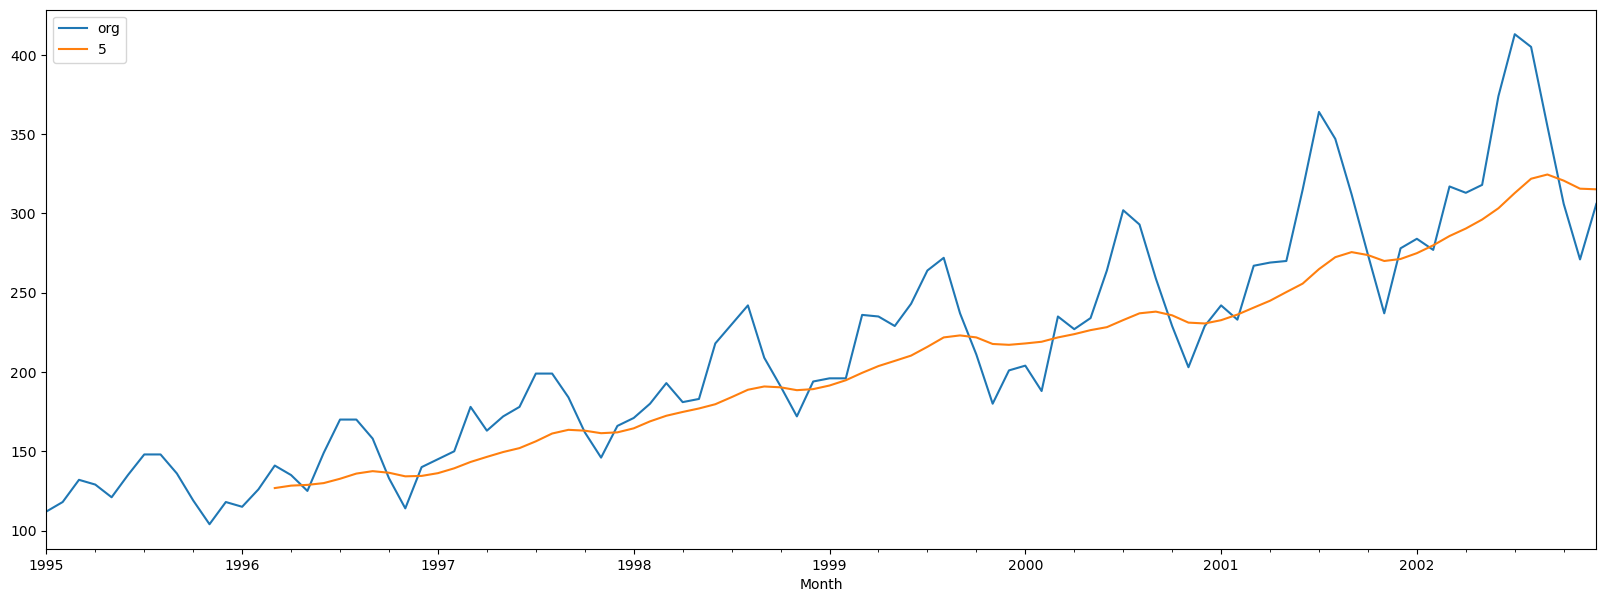

In [57]:
plt.figure(figsize=(20,7))
airline['Passengers'].plot(label='org')
airline['Passengers'].rolling(15).mean().plot(label=str(5))
plt.legend(loc='best')

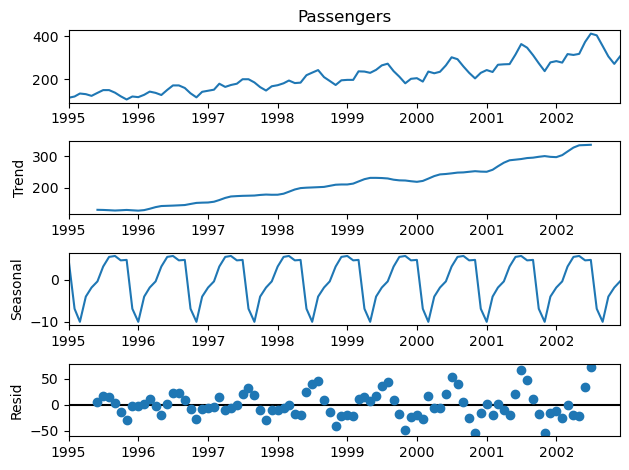

In [58]:
# Time Series decomposition Plot
time_series = seasonal_decompose(airline['Passengers'],period=10)
time_series.plot()
plt.show()

# Forcasting ACF And PACF

In [59]:
airline['Passengers_Diff']=airline['Passengers'].diff(periods=1)
airline

,Passengers,Passengers_Diff
Month,,
1995-01-01,112,NaN
1995-02-01,118,6.0
1995-03-01,132,14.0
1995-04-01,129,-3.0
1995-05-01,121,-8.0
...,...,...
2002-08-01,405,-8.0
2002-09-01,355,-50.0
2002-10-01,306,-49.0


In [60]:
airline = airline.dropna()
airline

,Passengers,Passengers_Diff
Month,,
1995-02-01,118,6.0
1995-03-01,132,14.0
1995-04-01,129,-3.0
1995-05-01,121,-8.0
1995-06-01,135,14.0
...,...,...
2002-08-01,405,-8.0
2002-09-01,355,-50.0
2002-10-01,306,-49.0


In [61]:
# Calculate ACF
acf_values = acf(airline['Passengers_Diff'])
np.round(acf_values,2)

array([ 1.  ,  0.25, -0.16, -0.19, -0.3 , -0.08,  0.05, -0.11, -0.29,
       -0.13, -0.14,  0.23,  0.77,  0.2 , -0.15, -0.14, -0.23, -0.03,
        0.01, -0.09])

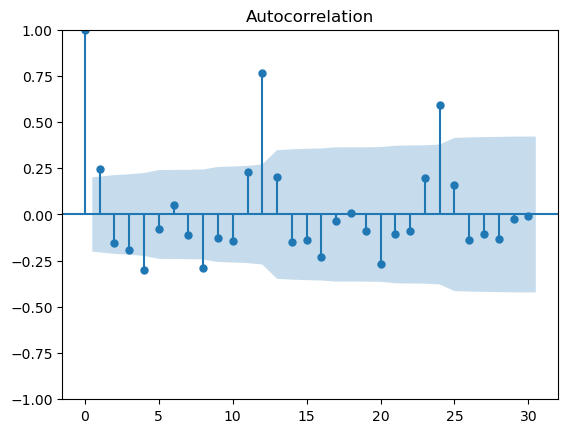

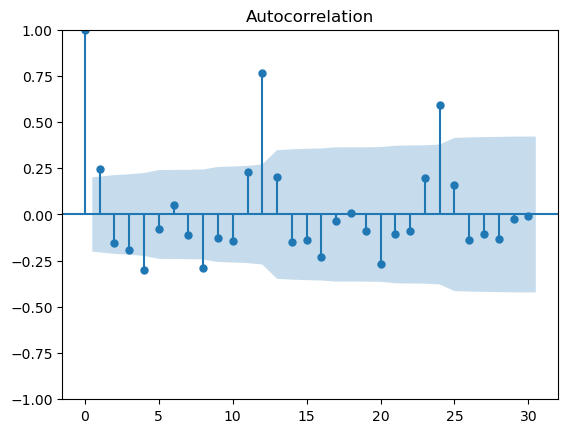

In [62]:
# PLot ACF 
plot_acf(airline['Passengers_Diff'],lags=30)

In [63]:
# Calculate PACF (Partial Auto Correlation Function)
pacf_values = pacf(airline['Passengers_Diff'])
np.round(pacf_values,2)

array([ 1.  ,  0.25, -0.24, -0.1 , -0.3 ,  0.02, -0.08, -0.25, -0.45,
       -0.22, -0.65, -0.37,  0.59, -0.12, -0.28,  0.26,  0.  , -0.1 ,
       -0.29,  0.39])

C:\Users\Mohan Patil\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


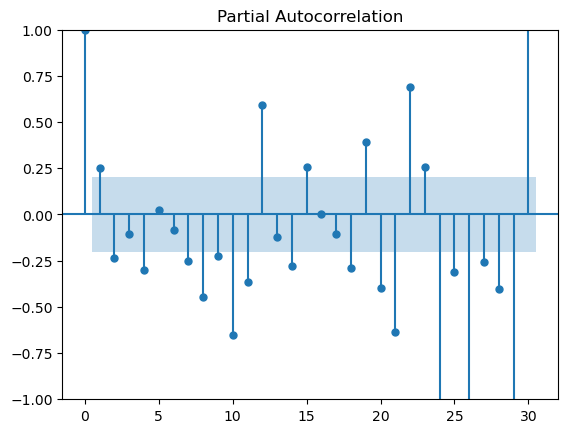

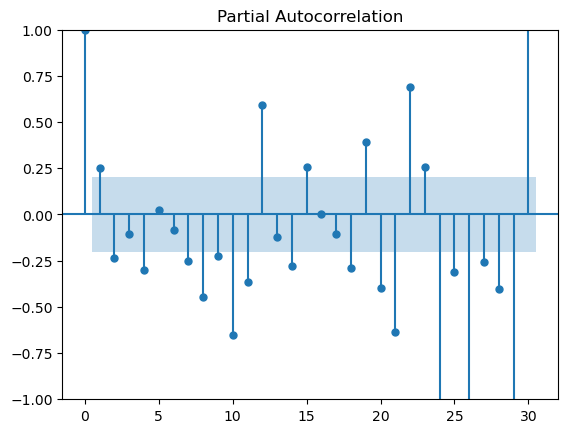

In [64]:
# plot PACF
plot_pacf(airline['Passengers_Diff'],lags=30)

In [65]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [84]:
# User define function -MAPE
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

## simple exponential method

In [67]:
# Split the data 
train = airline.head(84)
test = airline.tail(12)

sim_exp = SimpleExpSmoothing(train['Passengers']).fit(smoothing_level=0.2)
pred_sim_exp = sim_exp.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_sim_exp,test.Passengers)

C:\Users\Mohan Patil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


17.14919961461426

# Holt Method

In [68]:
from statsmodels.tsa.holtwinters import Holt
ht_model = Holt(train['Passengers']).fit(smoothing_level=0.8,smoothing_slope=0.2)
pred_ht = ht_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_ht,test.Passengers)

C:\Users\Mohan Patil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Mohan Patil\AppData\Local\Temp\ipykernel_3444\3564061482.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ht_model = Holt(train['Passengers']).fit(smoothing_level=0.8,smoothing_slope=0.2)


19.487088128263235

### Exponential_smoothing with additive seasonality and additive trend

In [69]:
exp_smt_add = ExponentialSmoothing(train['Passengers'],seasonal="add",trend="add",seasonal_periods=12).fit() 
pred_exp_smt_add = exp_smt_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_exp_smt_add,test.Passengers)

C:\Users\Mohan Patil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


5.936652268730518

### exponential_smoothing with multiplicative seasonality and additive trend

In [70]:
exp_smt_mul = ExponentialSmoothing(train['Passengers'],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_exp_mul_add = exp_smt_mul.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_exp_mul_add,test.Passengers)

C:\Users\Mohan Patil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2.7033036190143207

In [71]:
# Final Model 
final_model_Exp =ExponentialSmoothing(airline['Passengers'],seasonal='mul',trend='add',seasonal_periods=12).fit()
# Forcast for next 10 times
final_model_Exp.forecast(10)

C:\Users\Mohan Patil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2003-01-01    313.020123
2003-02-01    307.707508
2003-03-01    354.988230
2003-04-01    345.251974
2003-05-01    345.187337
2003-06-01    391.908695
2003-07-01    435.887418
2003-08-01    429.262869
2003-09-01    379.653883
2003-10-01    331.866705
Freq: MS, dtype: float64

#### Inference : Holts winter exponential smoothing with multiplicative seasonality and additive trend gives minimum error-2.70

# Forecasting using ARIMA model

In [72]:
airline_ama= pd.read_excel(r"C:\Users\Mohan Patil\OneDrive\Desktop\Datasets\Airlines+Data.xlsx",index_col=0, parse_dates=True)
airline_ama

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


<AxesSubplot:xlabel='Month'>

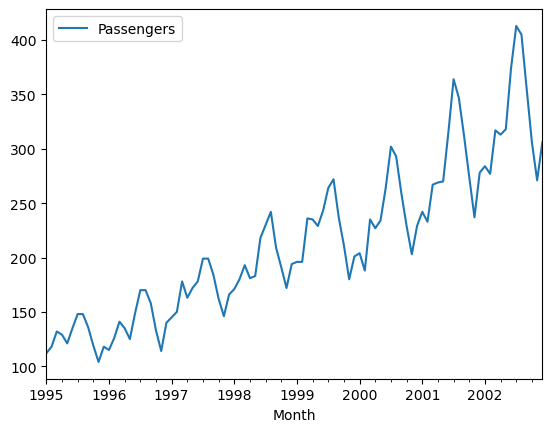

In [73]:
airline_ama.plot()

In [74]:
# Adfuller Test
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(airline_ama)

(0.01, False)

In [75]:
train = airline_ama[:85]
test = airline_ama[-20:]
print(train.shape,test.shape)

(85, 1) (20, 1)


# ARIMA Model Building

In [76]:
auto_arima_ = auto_arima(train, start_p=0, d=1, start_q=0,
                        max_p=2, max_d=1, max_q=1, start_P=0,
                        D=1, start_Q=0, max_P=2, max_D=1,
                        max_Q=2, m=12, seasonal=True,
                        error_action='warn',trace=True,
                        suppress_warnings=True,stepwise=True,
                         random_state=20,n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=543.172, Time=0.19 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=537.489, Time=0.17 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=537.888, Time=0.18 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=540.215, Time=0.07 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=539.489, Time=0.34 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=539.489, Time=0.23 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=537.948, Time=0.20 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.85 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=539.745, Time=0.11 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=539.466, Time=0.20 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=539.078, Time=0.19 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=537.388, Time=0.16 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=540.192, Time=0.08 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=539.385, Time=0.33 sec
 ARIMA(0,1,1)(1,1,1)[12]             

In [77]:
auto_arima_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   85
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood                -265.694
Date:                             Mon, 24 Apr 2023   AIC                            537.388
Time:                                     18:40:22   BIC                            544.218
Sample:                                 01-01-1995   HQIC                           540.108
                                      - 01-01-2002                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2607      0.105     -2.472      0.013      -0.467      -0.054
ar.S.L12      -0.2625      0.098     -2.683      0.007      -0.454      -0.071
sigma2        92.7245     16.167      5.735      0.000      61.038     124.411
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.62
Prob(Q):                              0.99   Prob(JB):                         0.27
Heteroskedasticity (H):               2.60   Skew:                             0.45
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [78]:
prediction = pd.DataFrame(auto_arima_.predict(n_periods = 25),index=test.index)
prediction.columns = ['predicted_result']
prediction

,predicted_result
Month,
2001-05-01,NaN
2001-06-01,NaN
2001-07-01,NaN
2001-08-01,NaN
2001-09-01,NaN
2001-10-01,NaN
2001-11-01,NaN
2001-12-01,NaN
2002-01-01,NaN


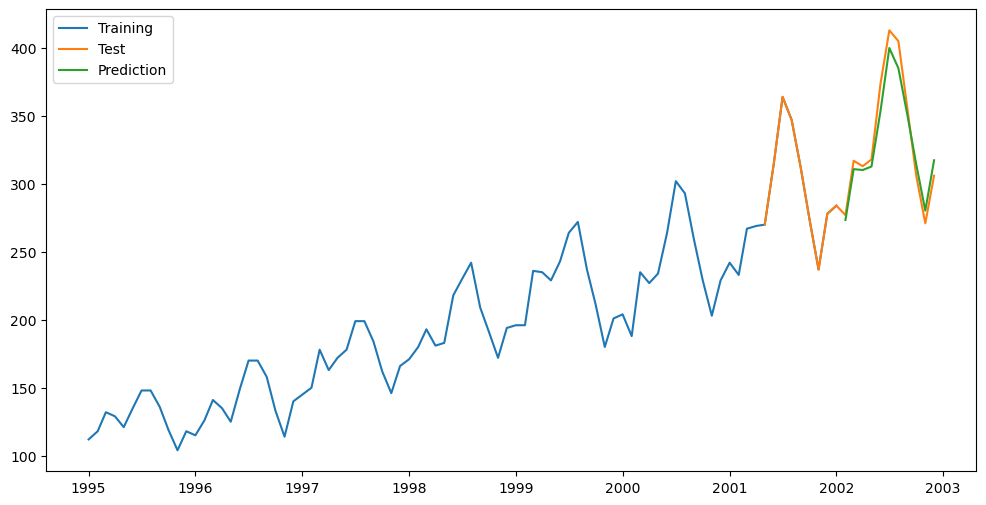

In [79]:
# visualize Prediction
plt.figure(figsize=(12,6))
plt.plot(train,label='Training')
plt.plot(test,label='Test')
plt.plot(prediction,label='Prediction')
plt.legend(loc='upper left')
plt.show()

# Build Final Model using train And test data

In [80]:
model = ARIMA(train,order=(3,1,3))# Predict best model
model = model.fit()

C:\Users\Mohan Patil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Mohan Patil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Mohan Patil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Mohan Patil\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [81]:
forecast=model.forecast(steps=15)
forecast

2002-02-01    285.005770
2002-03-01    301.315117
2002-04-01    310.006048
2002-05-01    324.040728
2002-06-01    327.659529
2002-07-01    330.757096
2002-08-01    324.636910
2002-09-01    318.330682
2002-10-01    307.973706
2002-11-01    300.983079
2002-12-01    295.037951
2003-01-01    294.515331
2003-02-01    296.485012
2003-03-01    302.266411
2003-04-01    308.358344
Freq: MS, Name: predicted_mean, dtype: float64

In [82]:
from statsmodels.graphics.tsaplots import plot_predict

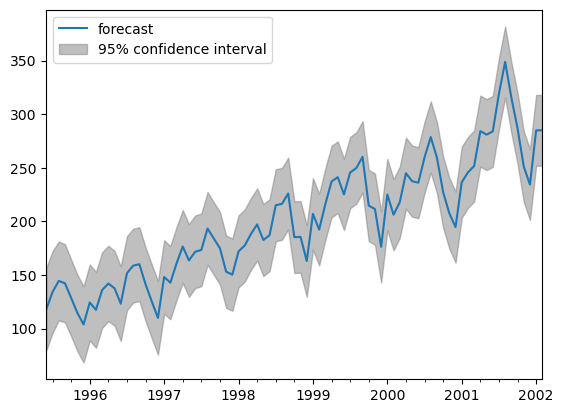

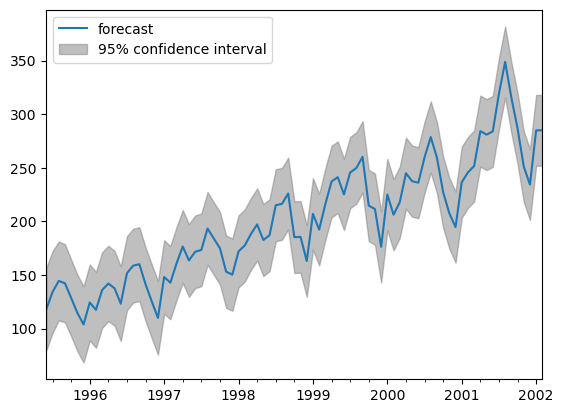

In [83]:
plot_predict(model,5,85)

#### Inference : Using auto_Arima model we get vales for ARIMA(0,1,1)(1,1,0)[12]